In [1]:
%load_ext autoreload
%autoreload 1
import os
from datetime import timedelta

import numpy as np
import obspy
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from obspy import UTCDateTime
from seispy.decon import RFTrace

from insight.util import TraceFile
from insight.util import trace_slice

pd.set_option("display.max_rows", 15)

# Load Data

In [2]:
DATA_DIR = "../data/"
CAT_FILE = "a_quality.parquet"
network, station, location = "XB", "ELYSE", "02"
# 
events = pd.read_parquet(os.path.join(DATA_DIR, CAT_FILE))
# trace_file = TraceFile(network, station, location, event.id)
# st = obspy.read(os.path.join(DATA_DIR, "zne", str(trace_file)))
events

,id,region name,time,quality,mqs_azimuth,mqs_distance,M_w,arrival,phase
earthquake name,,,,,,,,,
S1222a,mqs2022isne,Aeolis Northeast,2022-05-04T23:23:07.710516Z,A,109.000000,37.014014,4.6,2022-05-04 23:27:34+00:00,P
S0976a,mqs2021qpls,Coprates Northwest,2021-08-25T03:32:20.629953Z,A,101.000000,146.259259,4.3,2021-08-25 03:48:58.400000+00:00,PP
S1000a,mqs2021sijy,Lunae Palus Northwest,2021-09-18T17:46:20.639751Z,A,55.000000,128.291291,4.1,2021-09-18 18:01:15.900000+00:00,PP
S1094b,mqs2021zdzn,Diacria Southwest,2021-12-24T22:38:02.749173Z,A,40.000000,59.653654,4.0,2021-12-24 22:44:48.700000+00:00,P
S1133c,mqs2022cixp,Elysium Southeast,2022-02-03T08:04:36.469259Z,A,90.000000,30.006507,3.8,2022-02-03 08:08:11.700000+00:00,P
S0235b,mqs2019onhx,Elysium Southeast,2019-07-26T12:15:38.748239Z,A,258.030468,28.748749,3.7,2019-07-26 12:18:58.500000+00:00,P
S0173a,mqs2019jzqa,Elysium Southeast,2019-05-23T02:19:09.852879Z,A,91.000000,30.006507,3.7,2019-05-23 02:22:42.300000+00:00,P
S1048d,mqs2021vwbn,Elysium Southeast,2021-11-07T22:00:15.254098Z,A,100.000000,30.186186,3.6,2021-11-07 22:03:42.700000+00:00,P
S1022a,mqs2021tyvj,Elysium Northeast,2021-10-11T23:14:29.105382Z,A,63.000000,30.725225,3.6,2021-10-11 23:18:25.025302+00:00,P


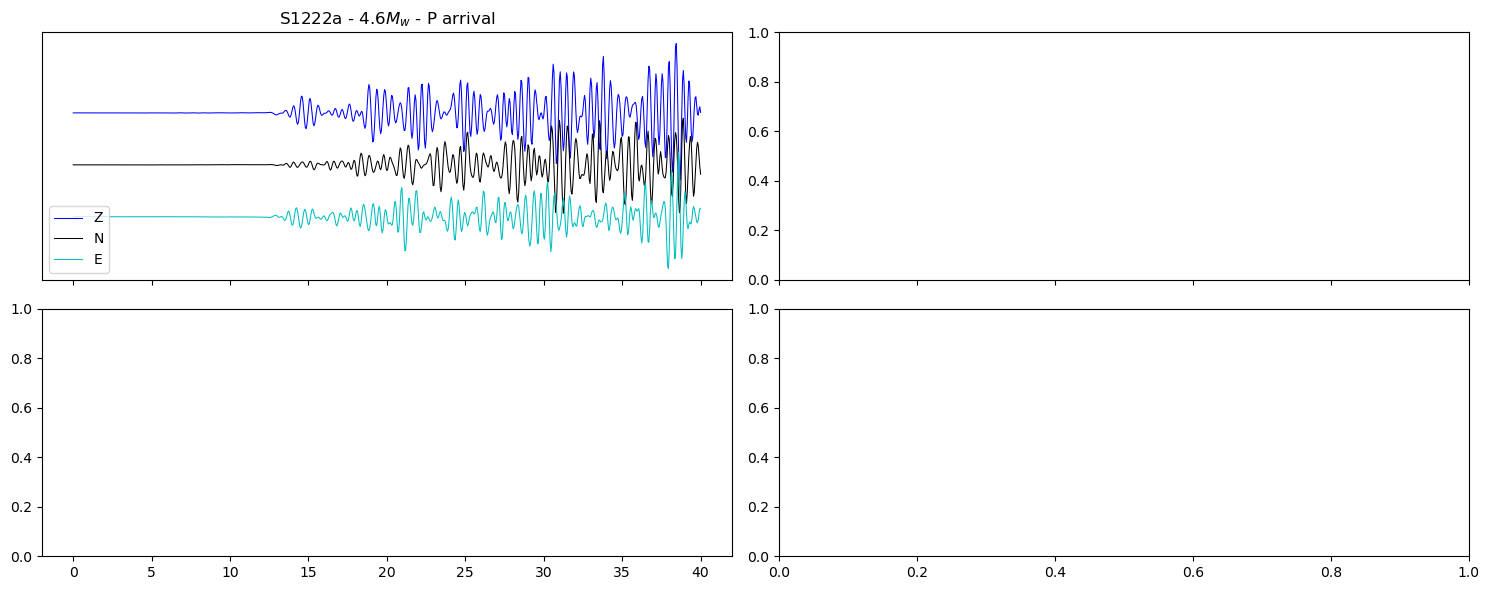

In [81]:
event_ids = events.index
fig, axs = plt.subplots(2, 2, figsize=(15,6), dpi=100, sharex="col")

channels = "ZNE"
colors = "bkc"

for i in range(len(event_ids)):
    x, y = int(i / 2), i % 2
    ax = axs[x, y]
    ax.set_yticks([])
    event = events.iloc[i]
    
    trace_file = TraceFile(network, station, location, event.id)
    st = obspy.read(os.path.join(DATA_DIR, "zne", str(trace_file)))
    st_sliced = st.slice(
        UTCDateTime(event.arrival),
        UTCDateTime(event.arrival + timedelta(seconds=40)),
    )
    st_sliced.detrend("linear")
    st_sliced.filter("bandpass", freqmin=0.01, freqmax=2.0, corners=4)
    st_sliced.normalize(global_max=True)
    # Plot
    ax.set_title(f"{event.name} - {event.M_w}$M_w$ - {event.phase} arrival")
    # ax.axvline(0, color="r", linestyle="--", linewidth=0.5)
    for j in range(len(channels)):
        tr = st_sliced.select(component=channels[j])[0]
        # ax.plot(tr.times(reftime=UTCDateTime(event.arrival)), tr.data - j * 0.75, color=colors[j], linewidth=0.75, label=channels[j])
        ax.plot(tr.times("relative"), tr.data - j * 0.75, color=colors[j], linewidth=0.75, label=channels[j])
    
    ax.legend(loc="lower left")
    break
fig.tight_layout()

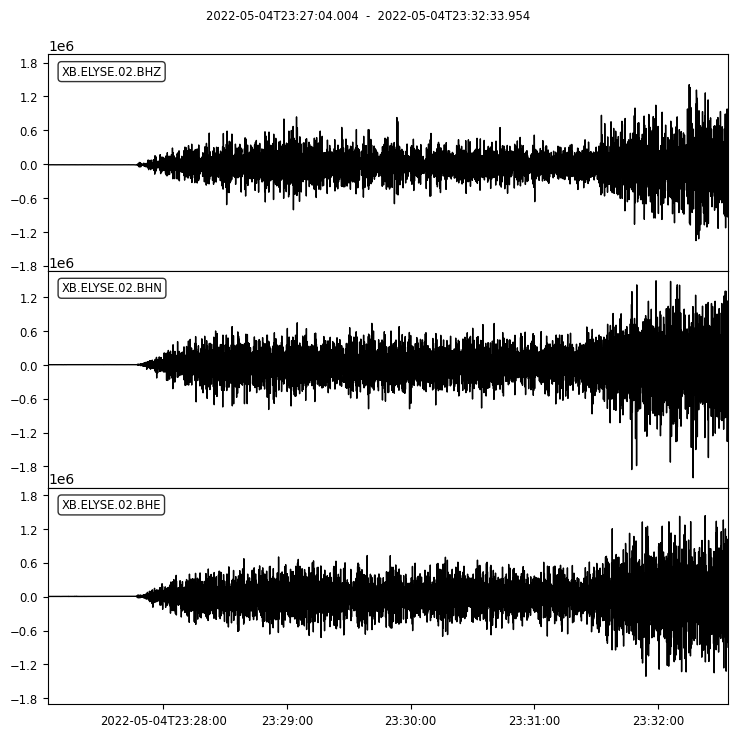

In [89]:
trace_file = TraceFile(network, station, location, "mqs2022isne")
st = obspy.read(os.path.join(DATA_DIR, "zne", str(trace_file)))
st.plot(show=False)